In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df=pd.read_csv("./df.csv")

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,Po,U,Ff,VV,Td,RRR,DDN
0,19038,6,31.25,31.67,20.3,2023-09-14 08:00:00,27.5,753.7,83.0,0.0,4.9,24.4,0.0,12.0
1,19039,7,35.22,35.67,19.8,2023-09-14 08:00:00,27.5,753.7,83.0,0.0,4.9,24.4,0.0,12.0
2,19040,8,39.62,40.14,20.7,2023-09-14 08:00:00,27.5,753.7,83.0,0.0,4.9,24.4,0.0,12.0
3,19041,9,50.39,51.03,27.2,2023-09-14 08:00:00,27.5,753.7,83.0,0.0,4.9,24.4,0.0,12.0
4,19042,10,25.24,25.64,17.4,2023-09-14 08:00:00,27.5,753.7,83.0,0.0,4.9,24.4,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,763.9,96.0,2.0,3.9,7.4,4.0,3.0
3841,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,763.9,96.0,2.0,3.9,7.4,4.0,3.0
3842,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,763.9,96.0,2.0,3.9,7.4,4.0,3.0
3843,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,763.9,96.0,2.0,3.9,7.4,4.0,3.0


In [11]:
df['date_time'] = pd.to_datetime(df['date_time']).dt.floor('min')
df.dtypes

id                          int64
device_id                   int64
active_power              float64
direct_power              float64
charge_capacity           float64
date_time          datetime64[ns]
T                         float64
Po                        float64
U                         float64
Ff                        float64
VV                        float64
Td                        float64
RRR                       float64
DDN                       float64
dtype: object

In [12]:
df

,id,device_id,active_power,direct_power,charge_capacity,date_time,T,Po,U,Ff,VV,Td,RRR,DDN
0,19038,6,31.25,31.67,20.3,2023-09-14 08:00:00,27.5,753.7,83.0,0.0,4.9,24.4,0.0,12.0
1,19039,7,35.22,35.67,19.8,2023-09-14 08:00:00,27.5,753.7,83.0,0.0,4.9,24.4,0.0,12.0
2,19040,8,39.62,40.14,20.7,2023-09-14 08:00:00,27.5,753.7,83.0,0.0,4.9,24.4,0.0,12.0
3,19041,9,50.39,51.03,27.2,2023-09-14 08:00:00,27.5,753.7,83.0,0.0,4.9,24.4,0.0,12.0
4,19042,10,25.24,25.64,17.4,2023-09-14 08:00:00,27.5,753.7,83.0,0.0,4.9,24.4,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,50268,6,8.44,8.78,55.4,2024-02-22 14:00:00,8.0,763.9,96.0,2.0,3.9,7.4,4.0,3.0
3841,50269,7,7.66,7.94,55.2,2024-02-22 14:00:00,8.0,763.9,96.0,2.0,3.9,7.4,4.0,3.0
3842,50270,8,8.21,8.45,54.5,2024-02-22 14:00:00,8.0,763.9,96.0,2.0,3.9,7.4,4.0,3.0
3843,50271,9,9.55,9.84,58.0,2024-02-22 14:00:00,8.0,763.9,96.0,2.0,3.9,7.4,4.0,3.0


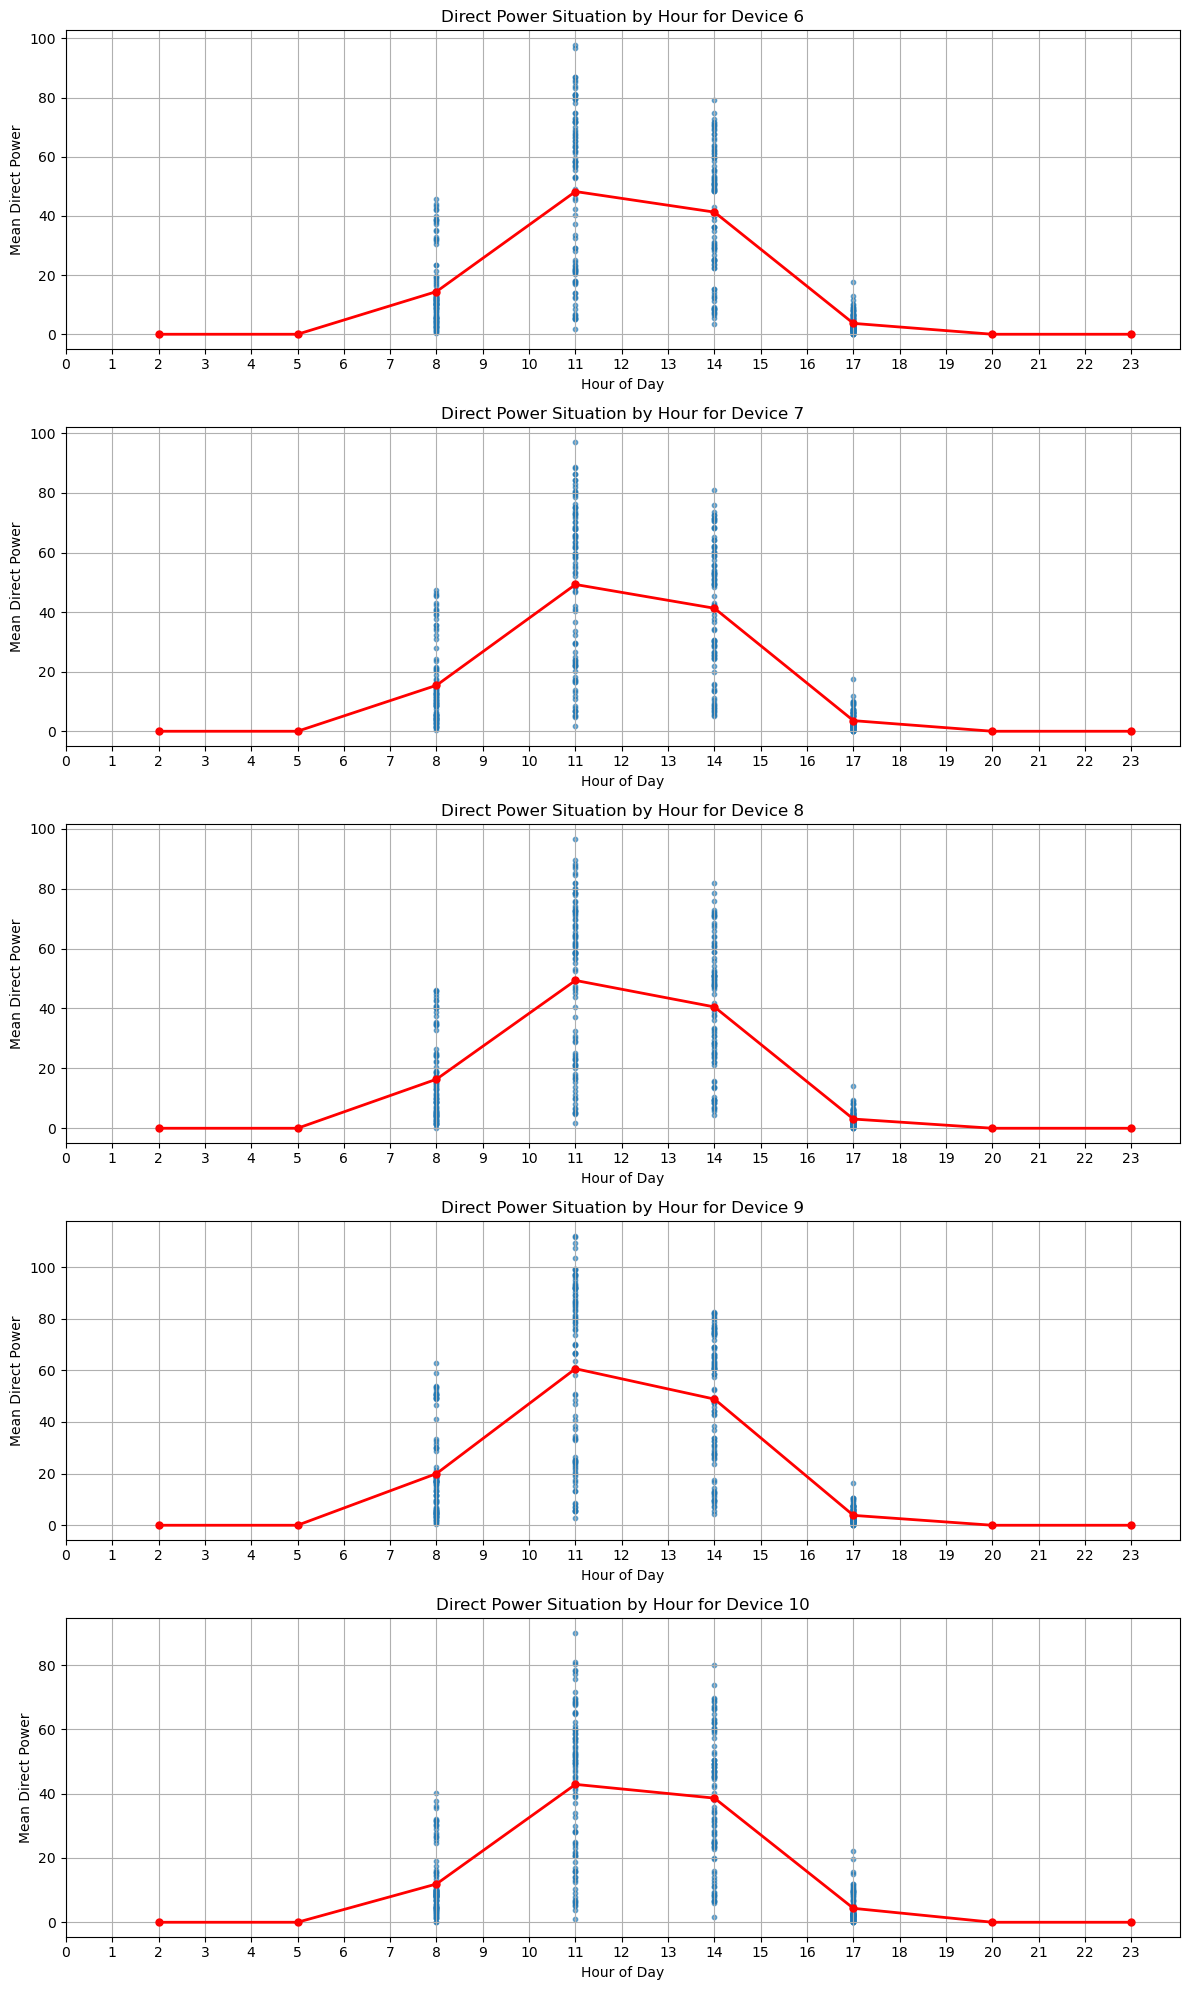

In [30]:
fig, axs = plt.subplots(5, 1, figsize=(12, 20)) 

for i, device_id in enumerate(range(6, 11)):
    filtered_df = df[df['device_id'] == device_id].copy()
    
    filtered_df['hour'] = filtered_df['date_time'].dt.hour
    
    mean_active_power = filtered_df.groupby('hour')['direct_power'].mean()
    
    axs[i].scatter(filtered_df['hour'], filtered_df['direct_power'], alpha=0.6, s=10, label='Individual Data Points')
    axs[i].plot(mean_active_power.index, mean_active_power.values, marker='o', linestyle='-', color='red',
                linewidth=2, markersize=5, label='Mean Direct Power')
    axs[i].set_title(f'Direct Power Situation by Hour for Device {device_id}')
    axs[i].set_xlabel('Hour of Day')
    axs[i].set_ylabel('Mean Direct Power')
    axs[i].grid(True)
    axs[i].set_xticks(range(0, 24))

plt.tight_layout()

plt.show()

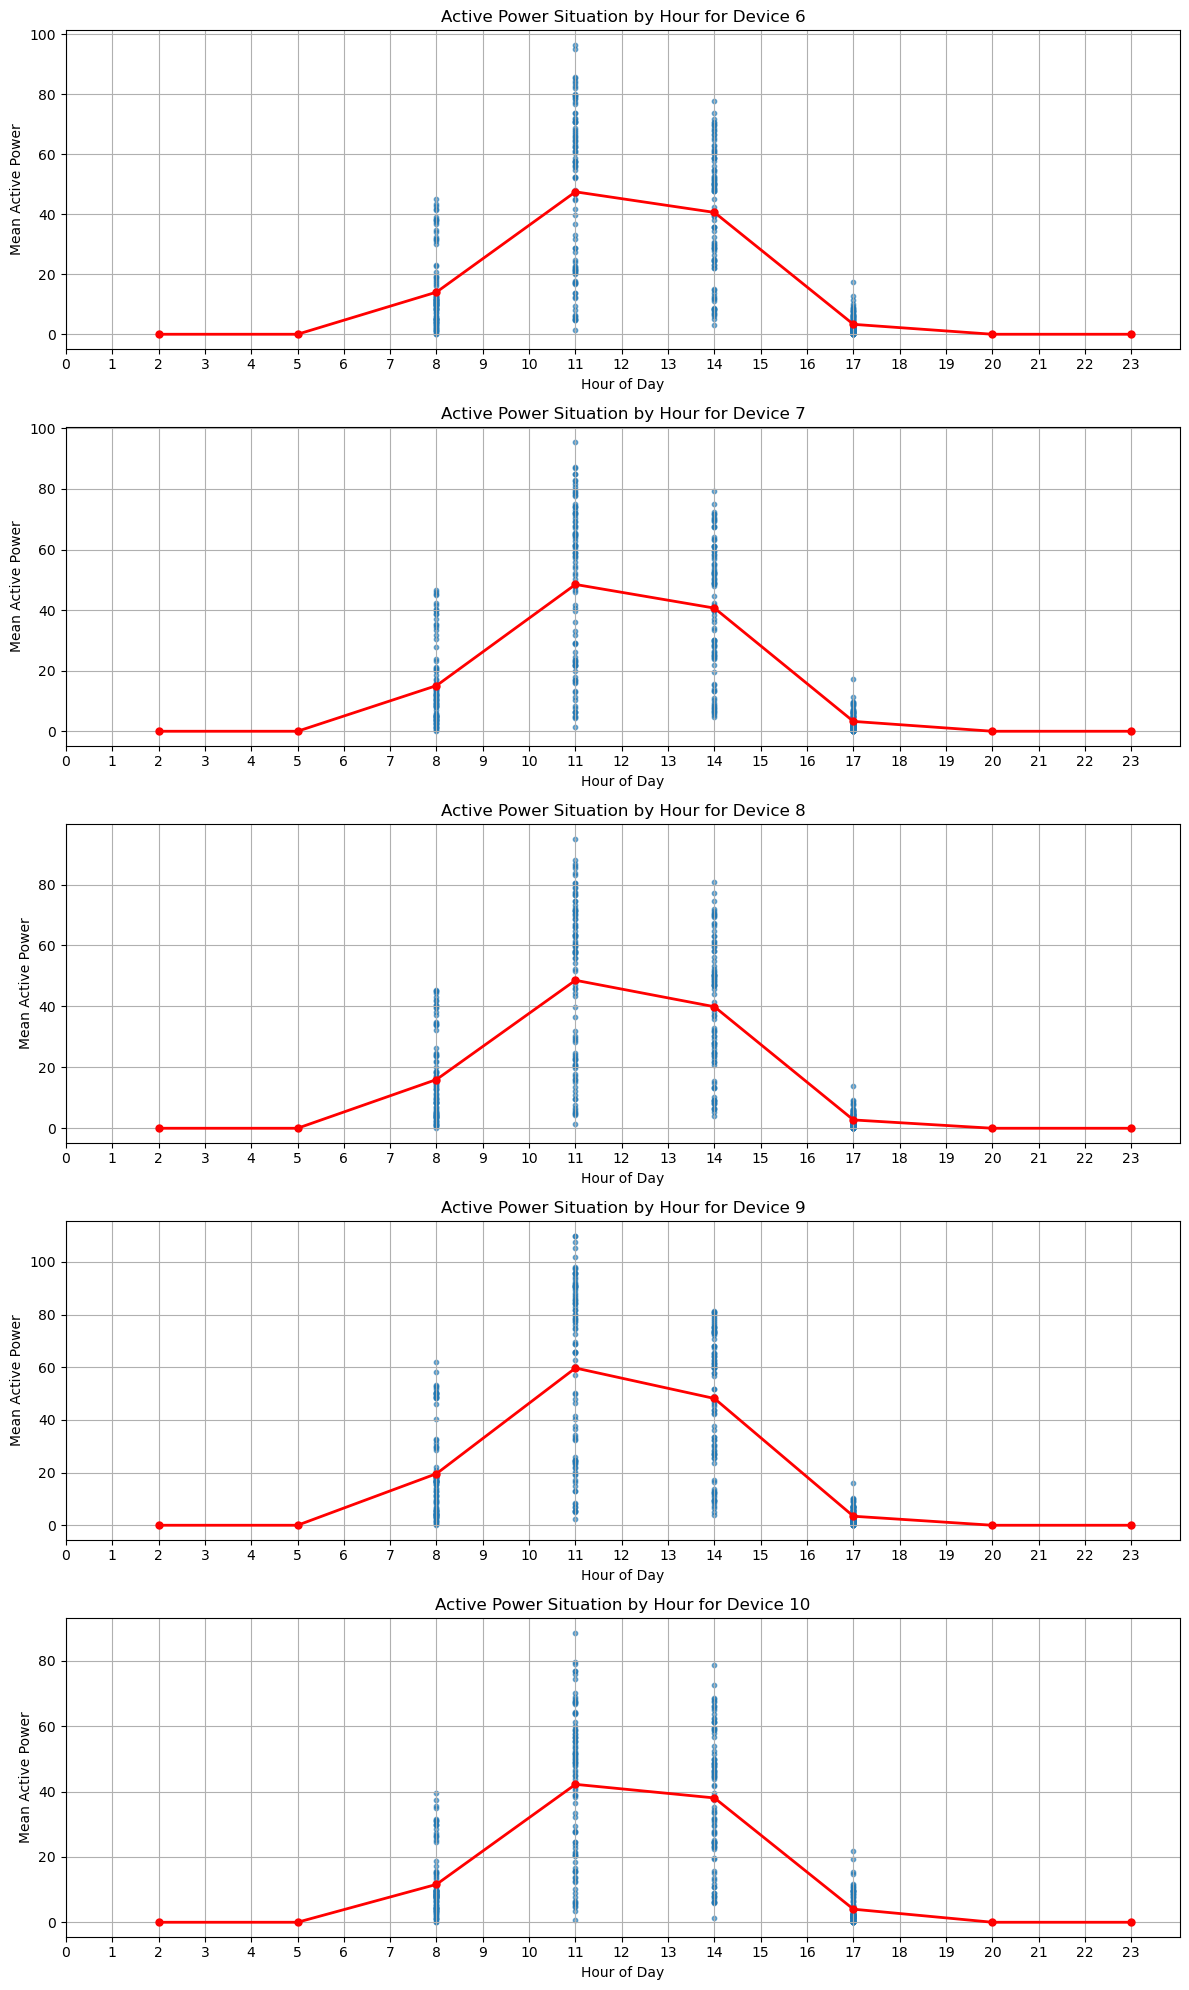

In [31]:
df['date_time'] = pd.to_datetime(df['date_time'])

fig, axs = plt.subplots(5, 1, figsize=(12, 20))

for i, device_id in enumerate(range(6, 11)):
    filtered_df = df[df['device_id'] == device_id].copy()
    
    filtered_df['hour'] = filtered_df['date_time'].dt.hour
    
    mean_active_power = filtered_df.groupby('hour')['active_power'].mean()
    
    axs[i].scatter(filtered_df['hour'], filtered_df['active_power'], alpha=0.6, s=10, label='Individual Data Points')
    axs[i].plot(mean_active_power.index, mean_active_power.values, marker='o', linestyle='-', color='red',
                linewidth=2, markersize=5, label='Mean Active Power')
    
    axs[i].set_title(f'Active Power Situation by Hour for Device {device_id}')
    axs[i].set_xlabel('Hour of Day')
    axs[i].set_ylabel('Mean Active Power')
    axs[i].grid(True)
    axs[i].set_xticks(range(0, 24))

plt.tight_layout()

plt.show()

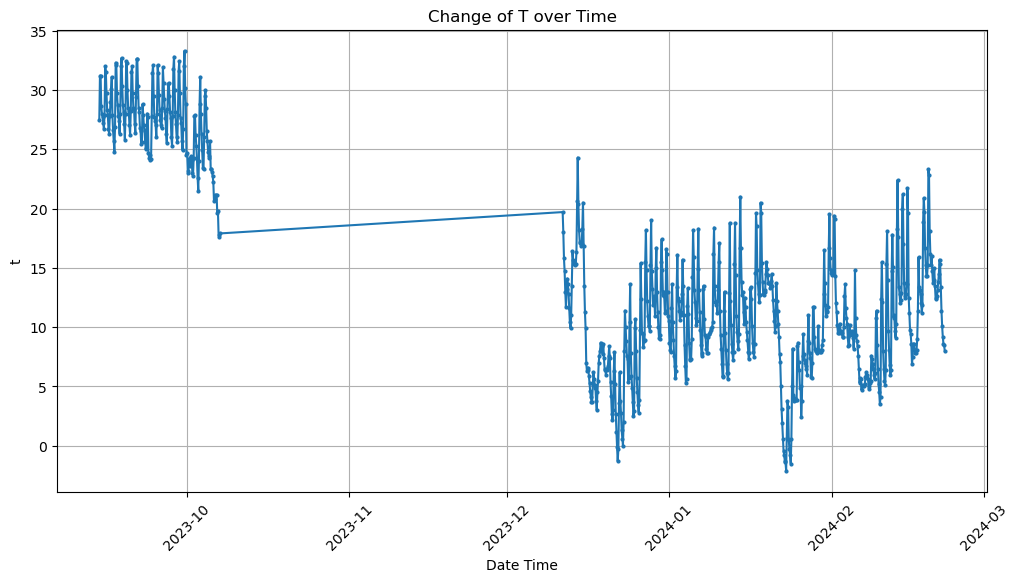

In [38]:
df_unique = df.drop_duplicates(subset='date_time', keep='first')

df_unique = df_unique.sort_values('date_time')

plt.figure(figsize=(12, 6))
plt.plot(df_unique['date_time'], df_unique['T'], marker='o', linestyle='-', markersize=2)
plt.title('Change of T over Time')
plt.xlabel('Date Time')
plt.ylabel('t')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

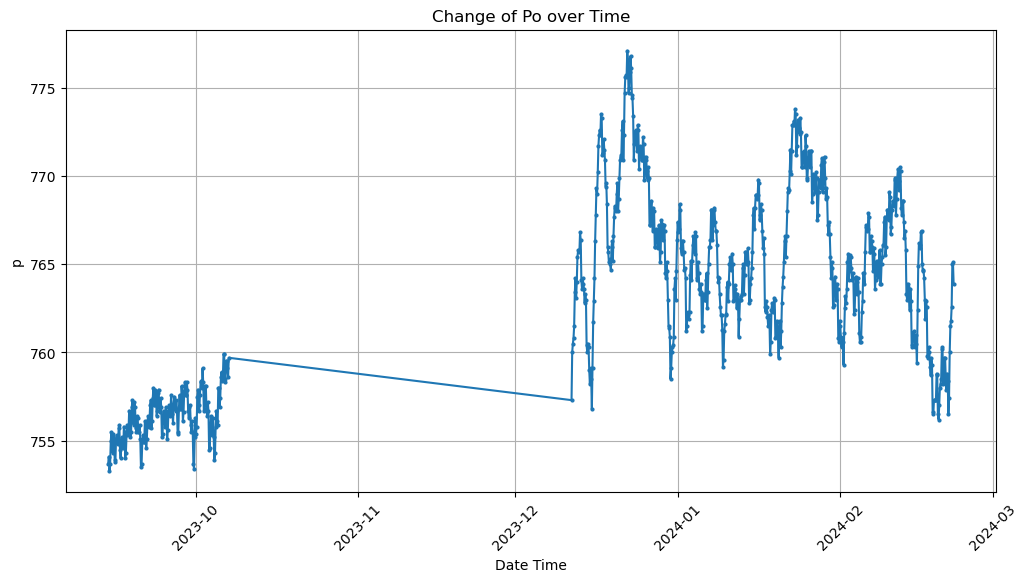

In [45]:
df_unique = df.drop_duplicates(subset='date_time', keep='first')

df_unique = df_unique.sort_values('date_time')

plt.figure(figsize=(12, 6))
plt.plot(df_unique['date_time'], df_unique['Po'], marker='o', linestyle='-', markersize=2)
plt.title('Change of Po over Time')
plt.xlabel('Date Time')
plt.ylabel('p')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

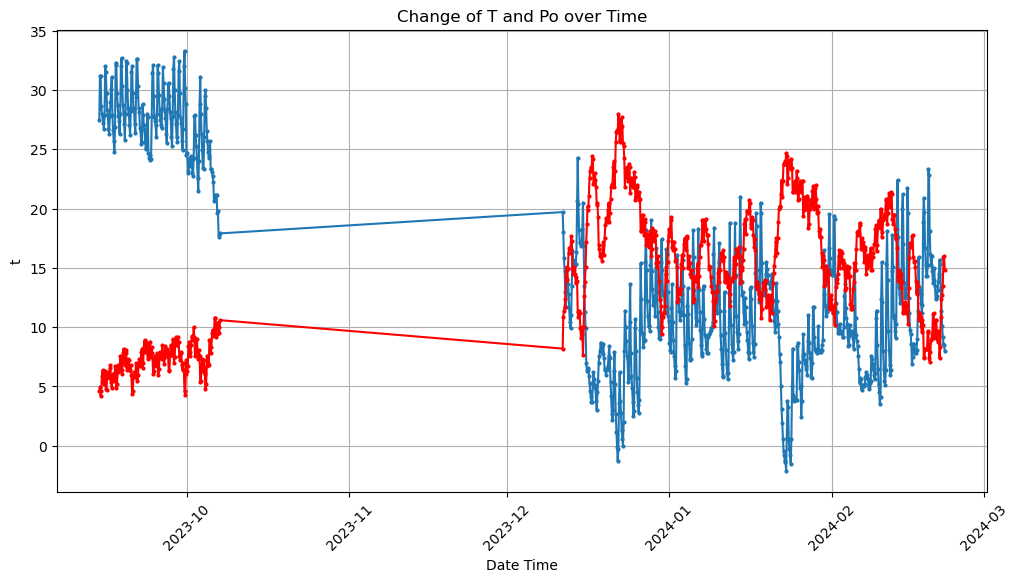

In [61]:
df_unique = df.drop_duplicates(subset='date_time', keep='first')

df_unique = df_unique.sort_values('date_time')

plt.figure(figsize=(12, 6))
plt.plot(df_unique['date_time'], df_unique['T'], marker='o', linestyle='-', markersize=2)
plt.plot(df_unique['date_time'], df_unique['T'].mean()+(df_unique['Po']-df_unique['Po'].mean()), marker='o', linestyle='-', markersize=2, color='red')
mean_active_power = filtered_df['active_power'].mean()
plt.title('Change of T and Po over Time')
plt.xlabel('Date Time')
plt.ylabel('t')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

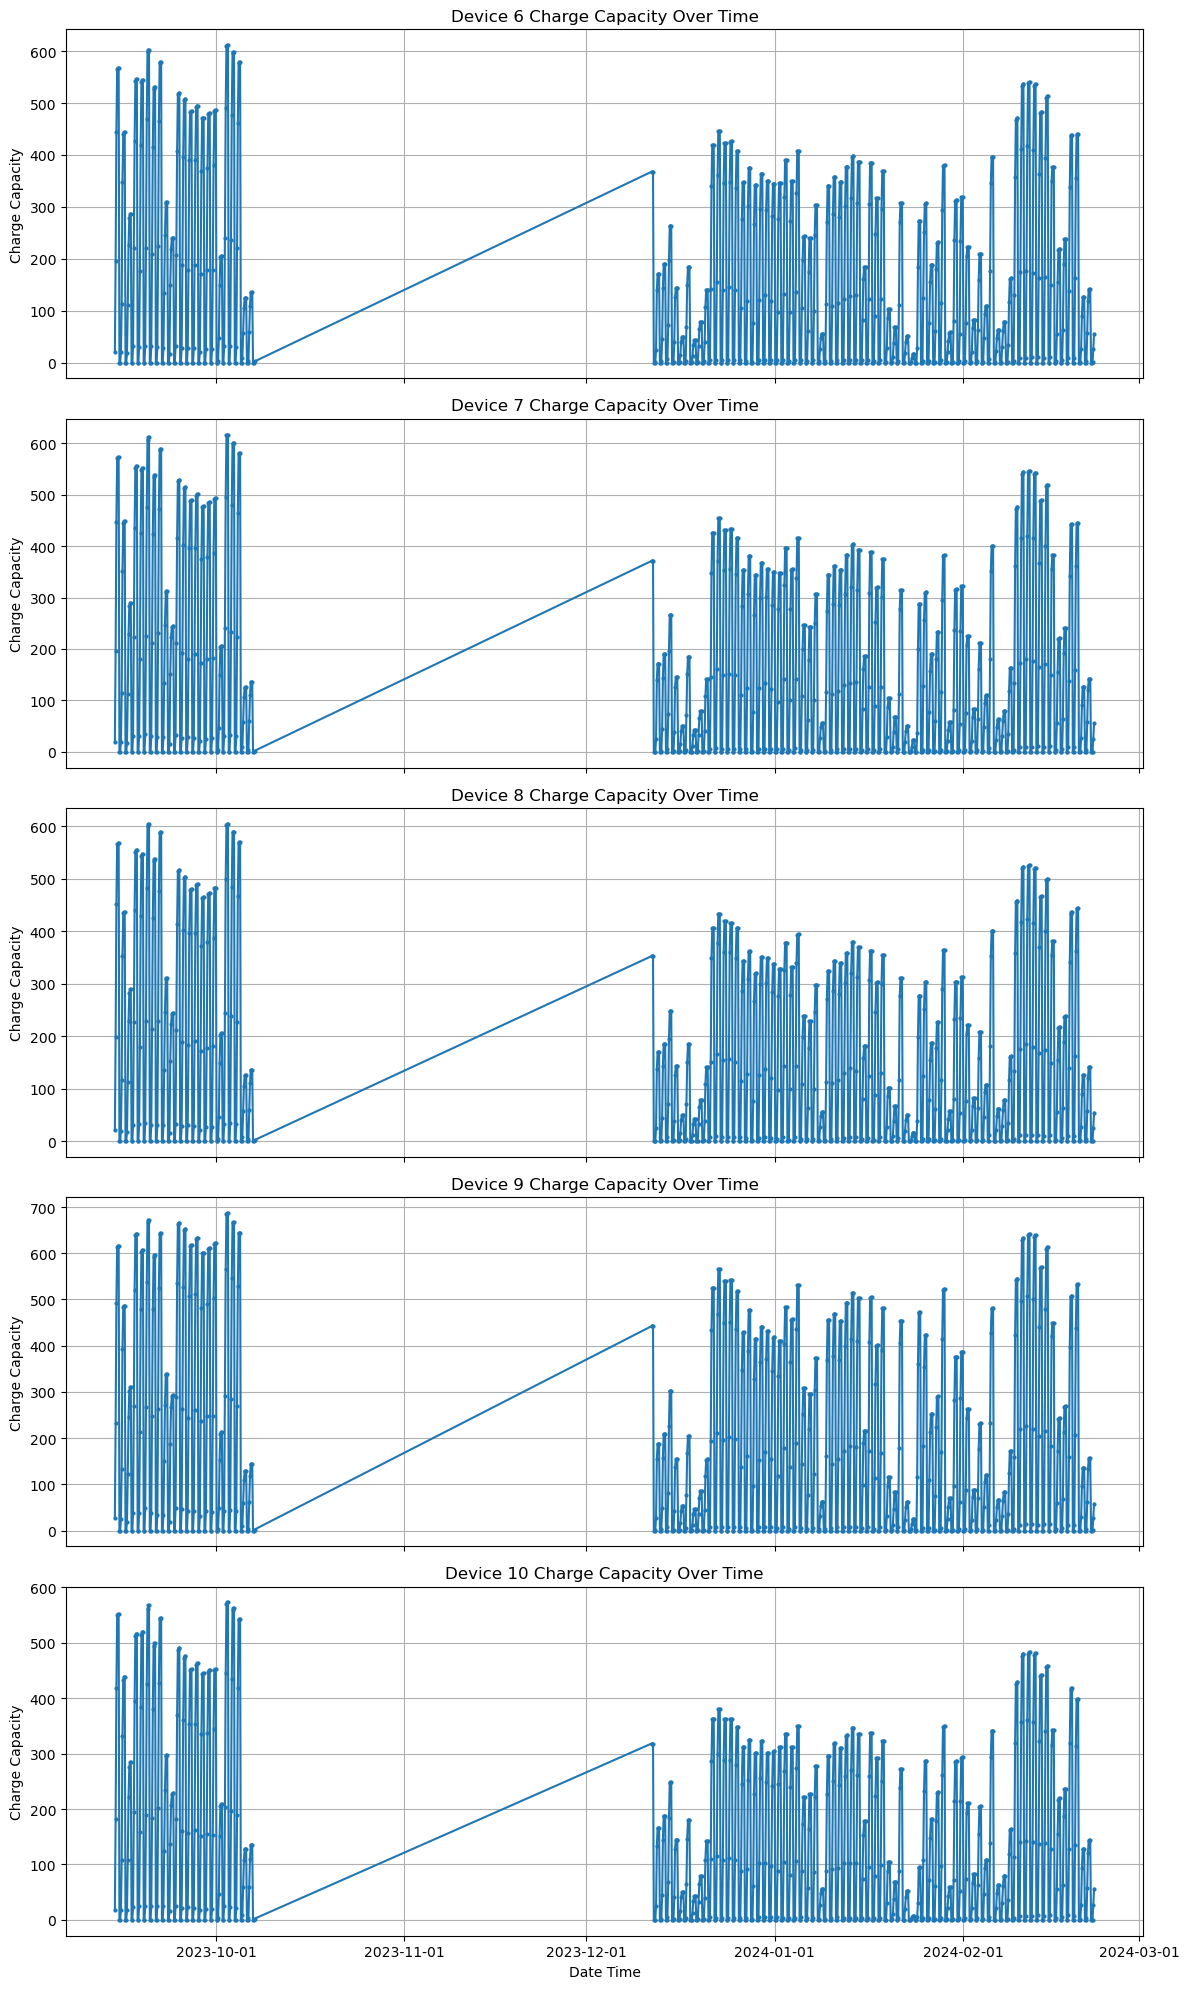

In [44]:
df = df.sort_values('date_time')

# Now plotting
fig, axs = plt.subplots(5, 1, figsize=(12, 20), sharex=True)  

# Plot 'charge_capacity' for each device_id from 6 to 10
for i, device_id in enumerate(range(6, 11)):
    # Filter data for the specific device_id
    device_df = df[df['device_id'] == device_id]
    
    # Plotting 'charge_capacity' against 'date_time'
    axs[i].plot(device_df['date_time'], device_df['charge_capacity'], marker='o', markersize=2, linestyle='-', label=f'Device {device_id}')
    axs[i].set_title(f'Device {device_id} Charge Capacity Over Time')
    axs[i].set_ylabel('Charge Capacity')
    axs[i].grid(True)
    
    # Format the x-axis to show dates clearly
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axs[i].xaxis.set_major_locator(mdates.AutoDateLocator())

# Set common labels
axs[-1].set_xlabel('Date Time')  # Only set x-label for the bottom chart
plt.tight_layout()  # Adjust subplots to fit into the canvas
plt.show()


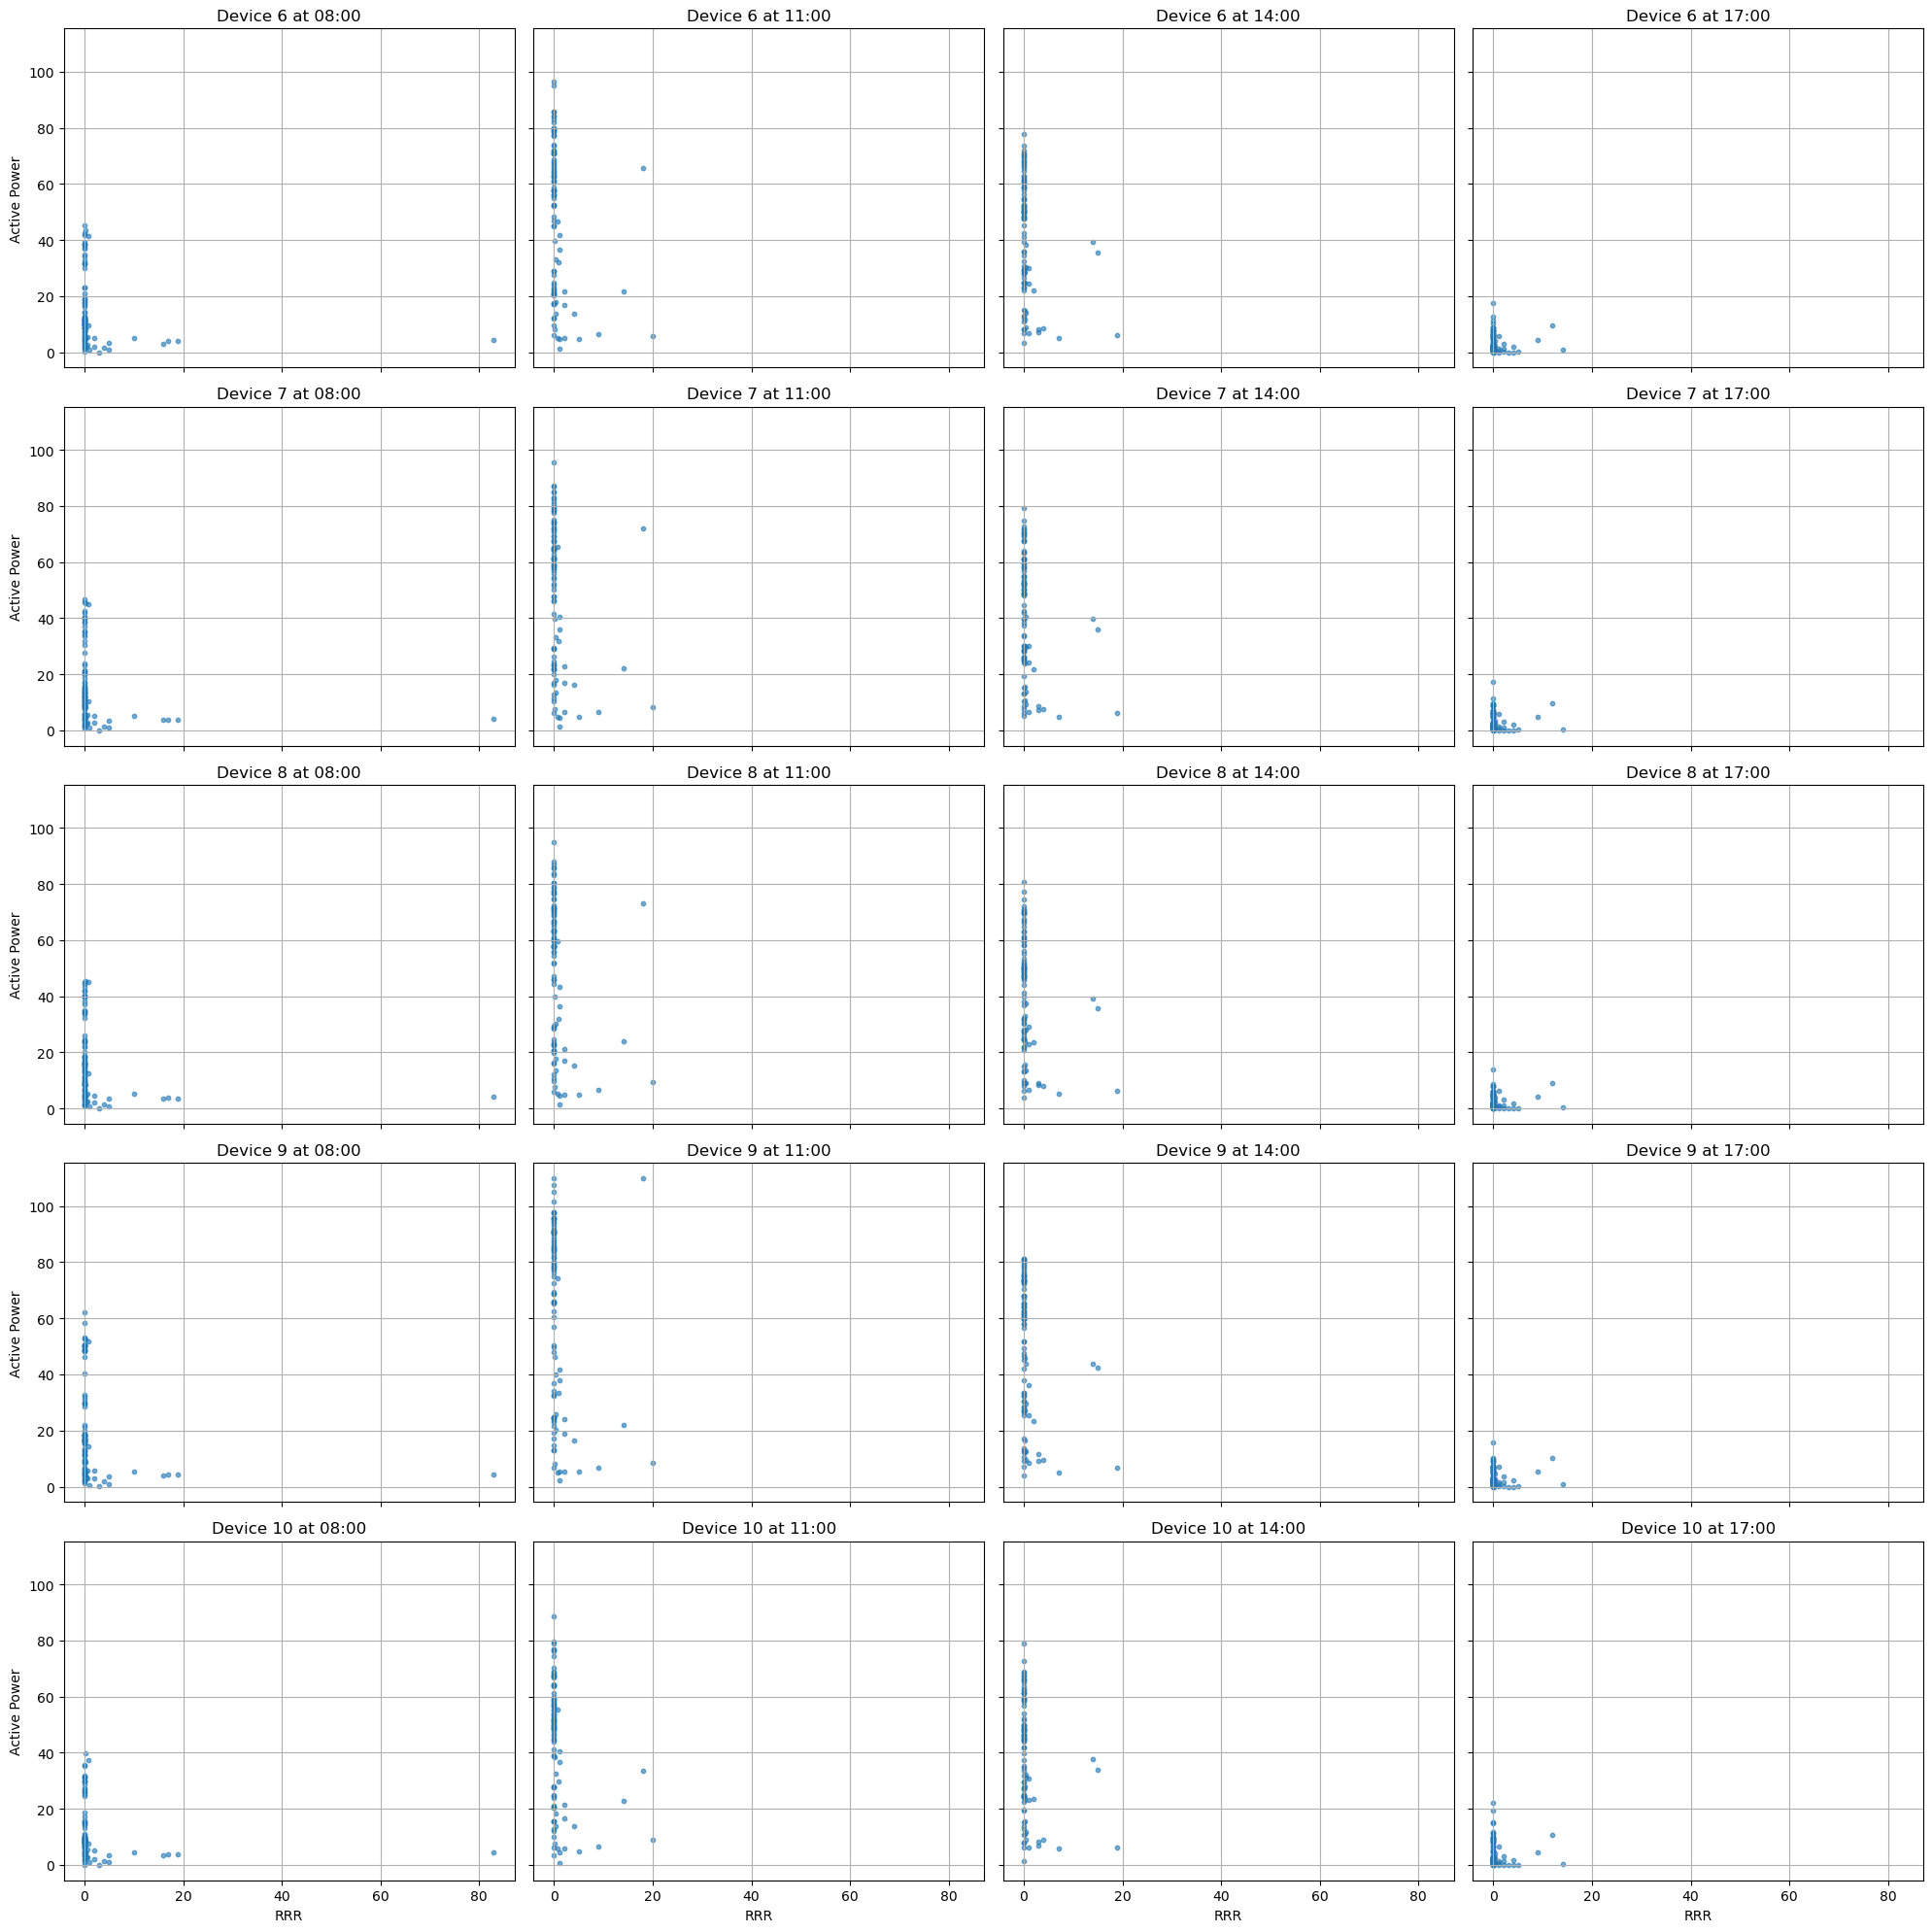

In [65]:
times = ['08:00', '11:00', '14:00', '17:00']
times = [pd.to_datetime(t).time() for t in times]

fig, axs = plt.subplots(5, 4, figsize=(20, 20), sharex=True, sharey=True)

for i, device_id in enumerate(range(6, 11)):
    for j, specific_time in enumerate(times):
        time_filtered_df = df[(df['device_id'] == device_id) & (df['date_time'].dt.time == specific_time)]
        
        axs[i, j].scatter(time_filtered_df['RRR'], time_filtered_df['active_power'], alpha=0.6, s=10)
        axs[i, j].set_title(f'Device {device_id} at {specific_time.strftime("%H:%M")}')
        axs[i, j].grid(True)

for ax in axs.flat:
    ax.set(xlabel='RRR', ylabel='Active Power')
    ax.label_outer()

plt.tight_layout()
plt.show()

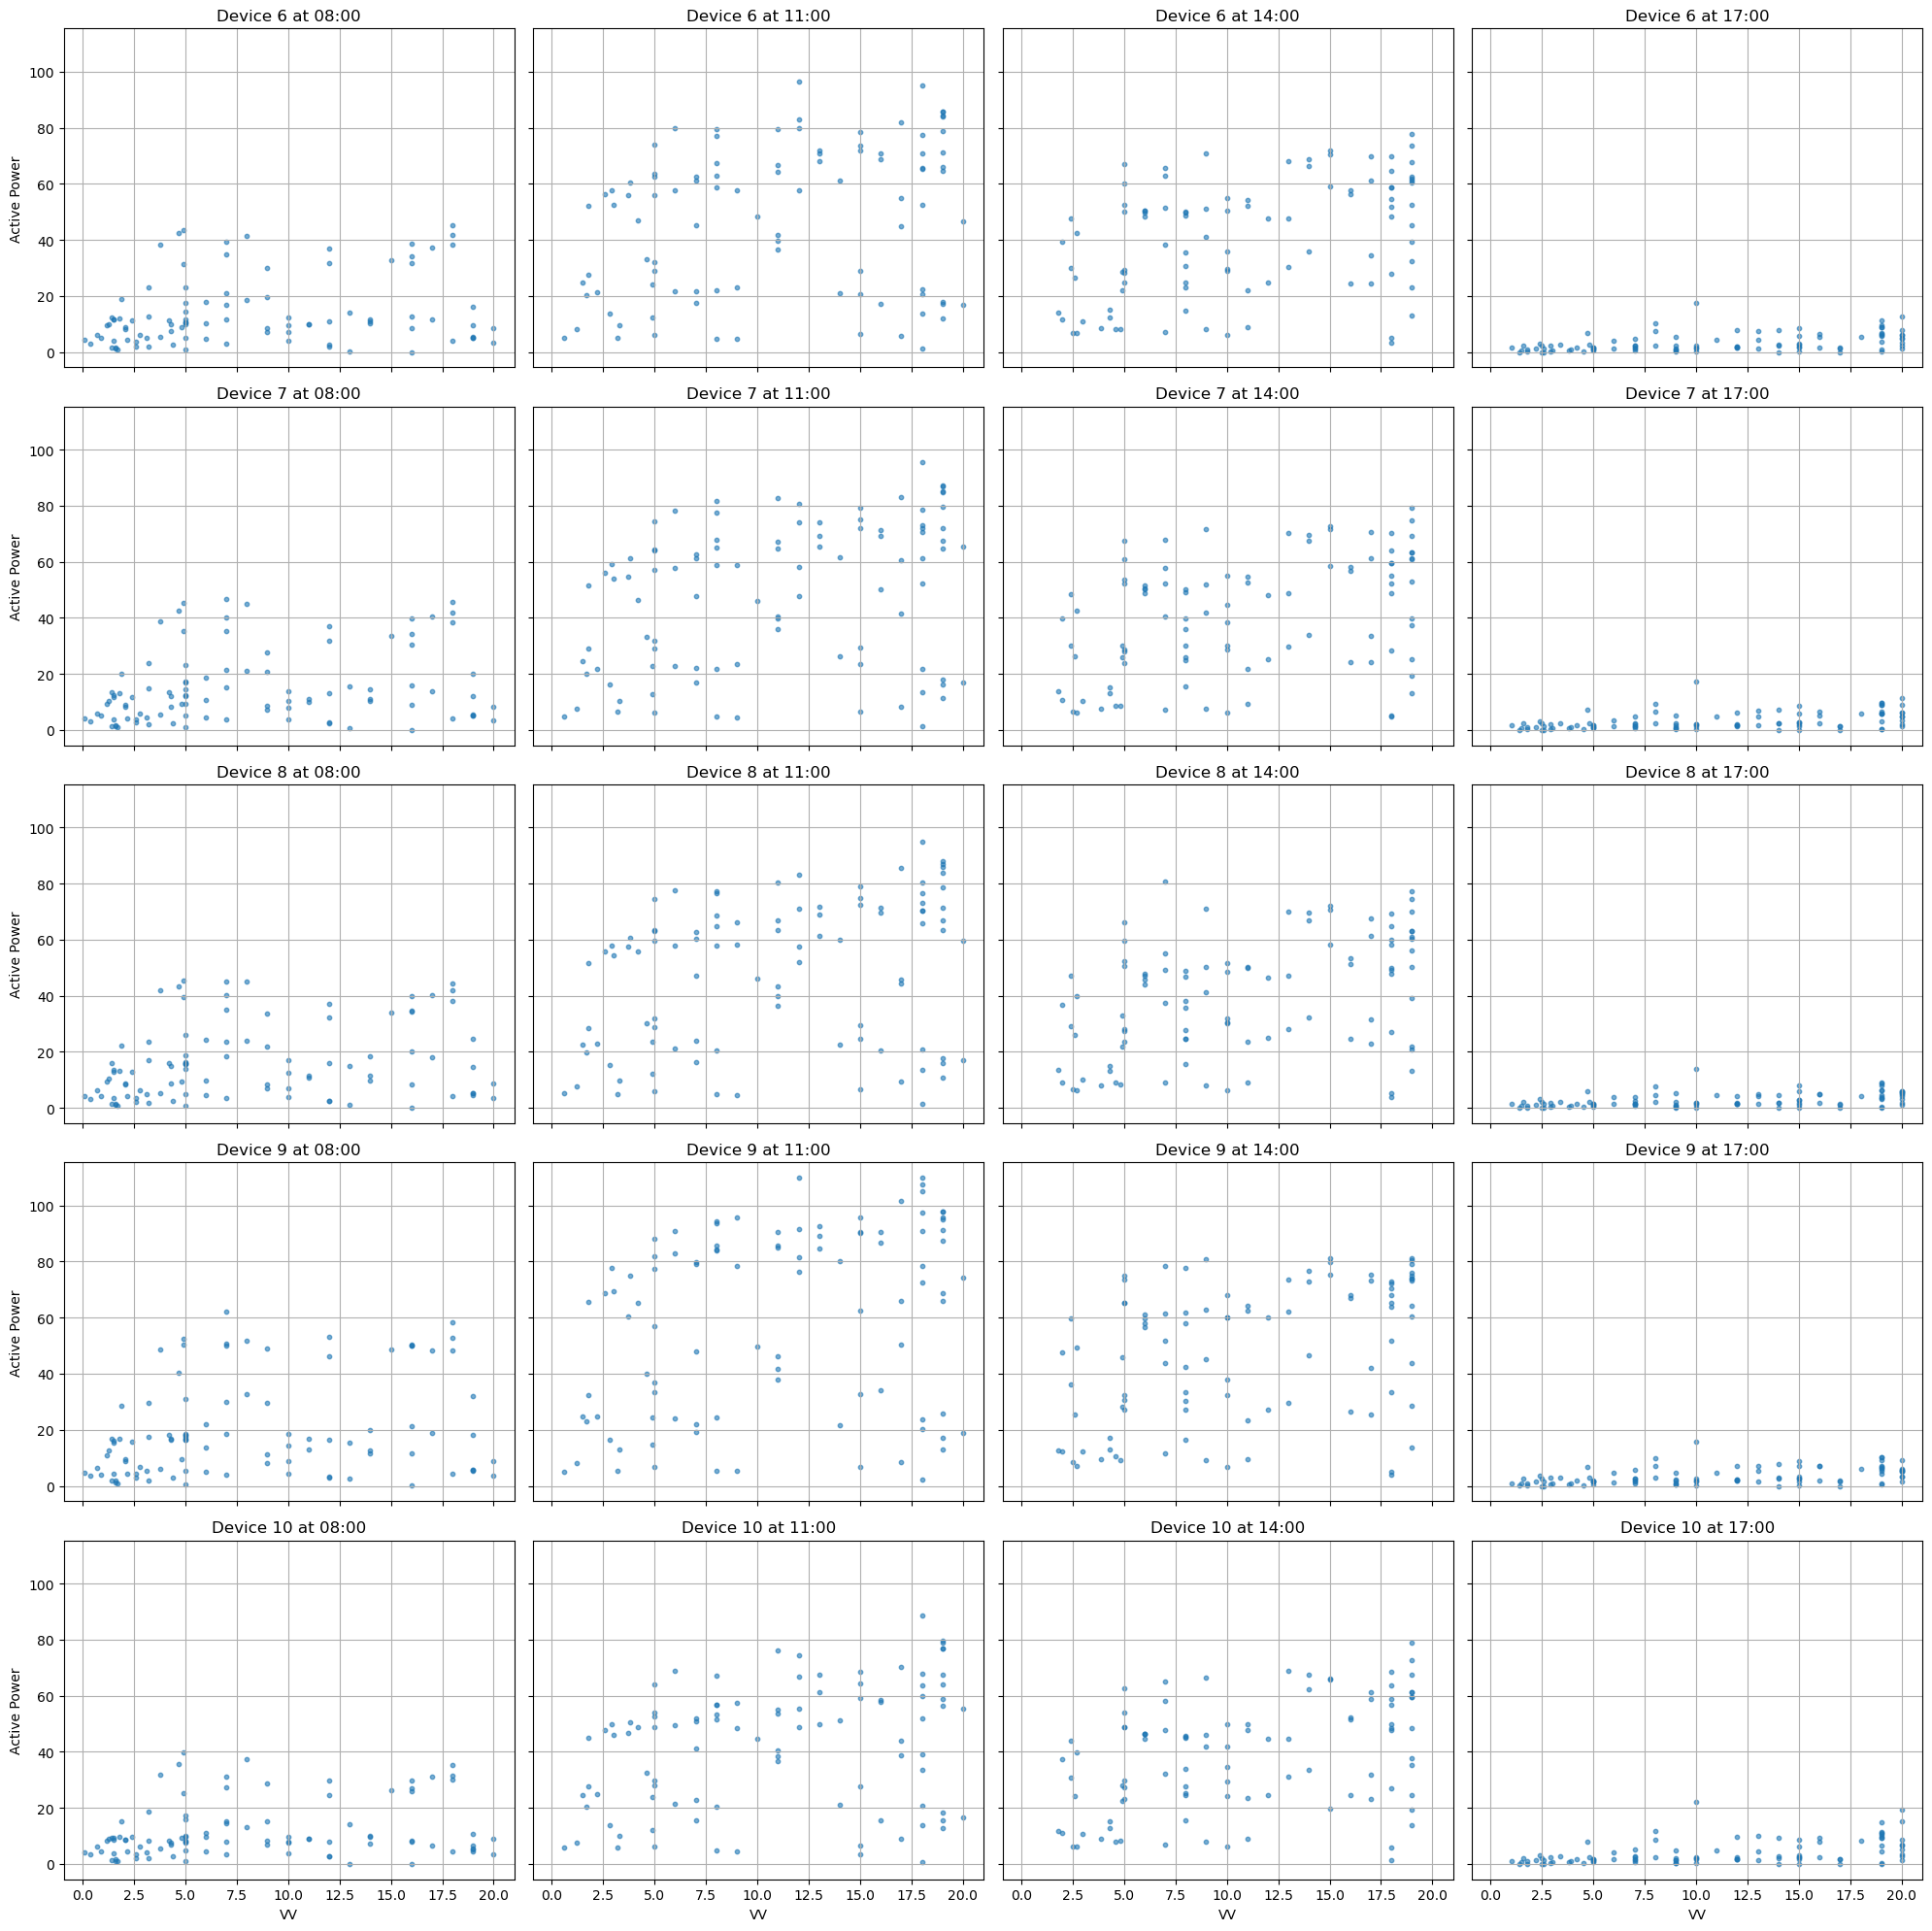

In [67]:
times = ['08:00', '11:00', '14:00', '17:00']
times = [pd.to_datetime(t).time() for t in times]

fig, axs = plt.subplots(5, 4, figsize=(20, 20), sharex=True, sharey=True)

for i, device_id in enumerate(range(6, 11)):
    for j, specific_time in enumerate(times):
        time_filtered_df = df[(df['device_id'] == device_id) & (df['date_time'].dt.time == specific_time)]
        
        axs[i, j].scatter(time_filtered_df['VV'], time_filtered_df['active_power'], alpha=0.6, s=10)
        axs[i, j].set_title(f'Device {device_id} at {specific_time.strftime("%H:%M")}')
        axs[i, j].grid(True)

for ax in axs.flat:
    ax.set(xlabel='VV', ylabel='Active Power')
    ax.label_outer()

plt.tight_layout()
plt.show()

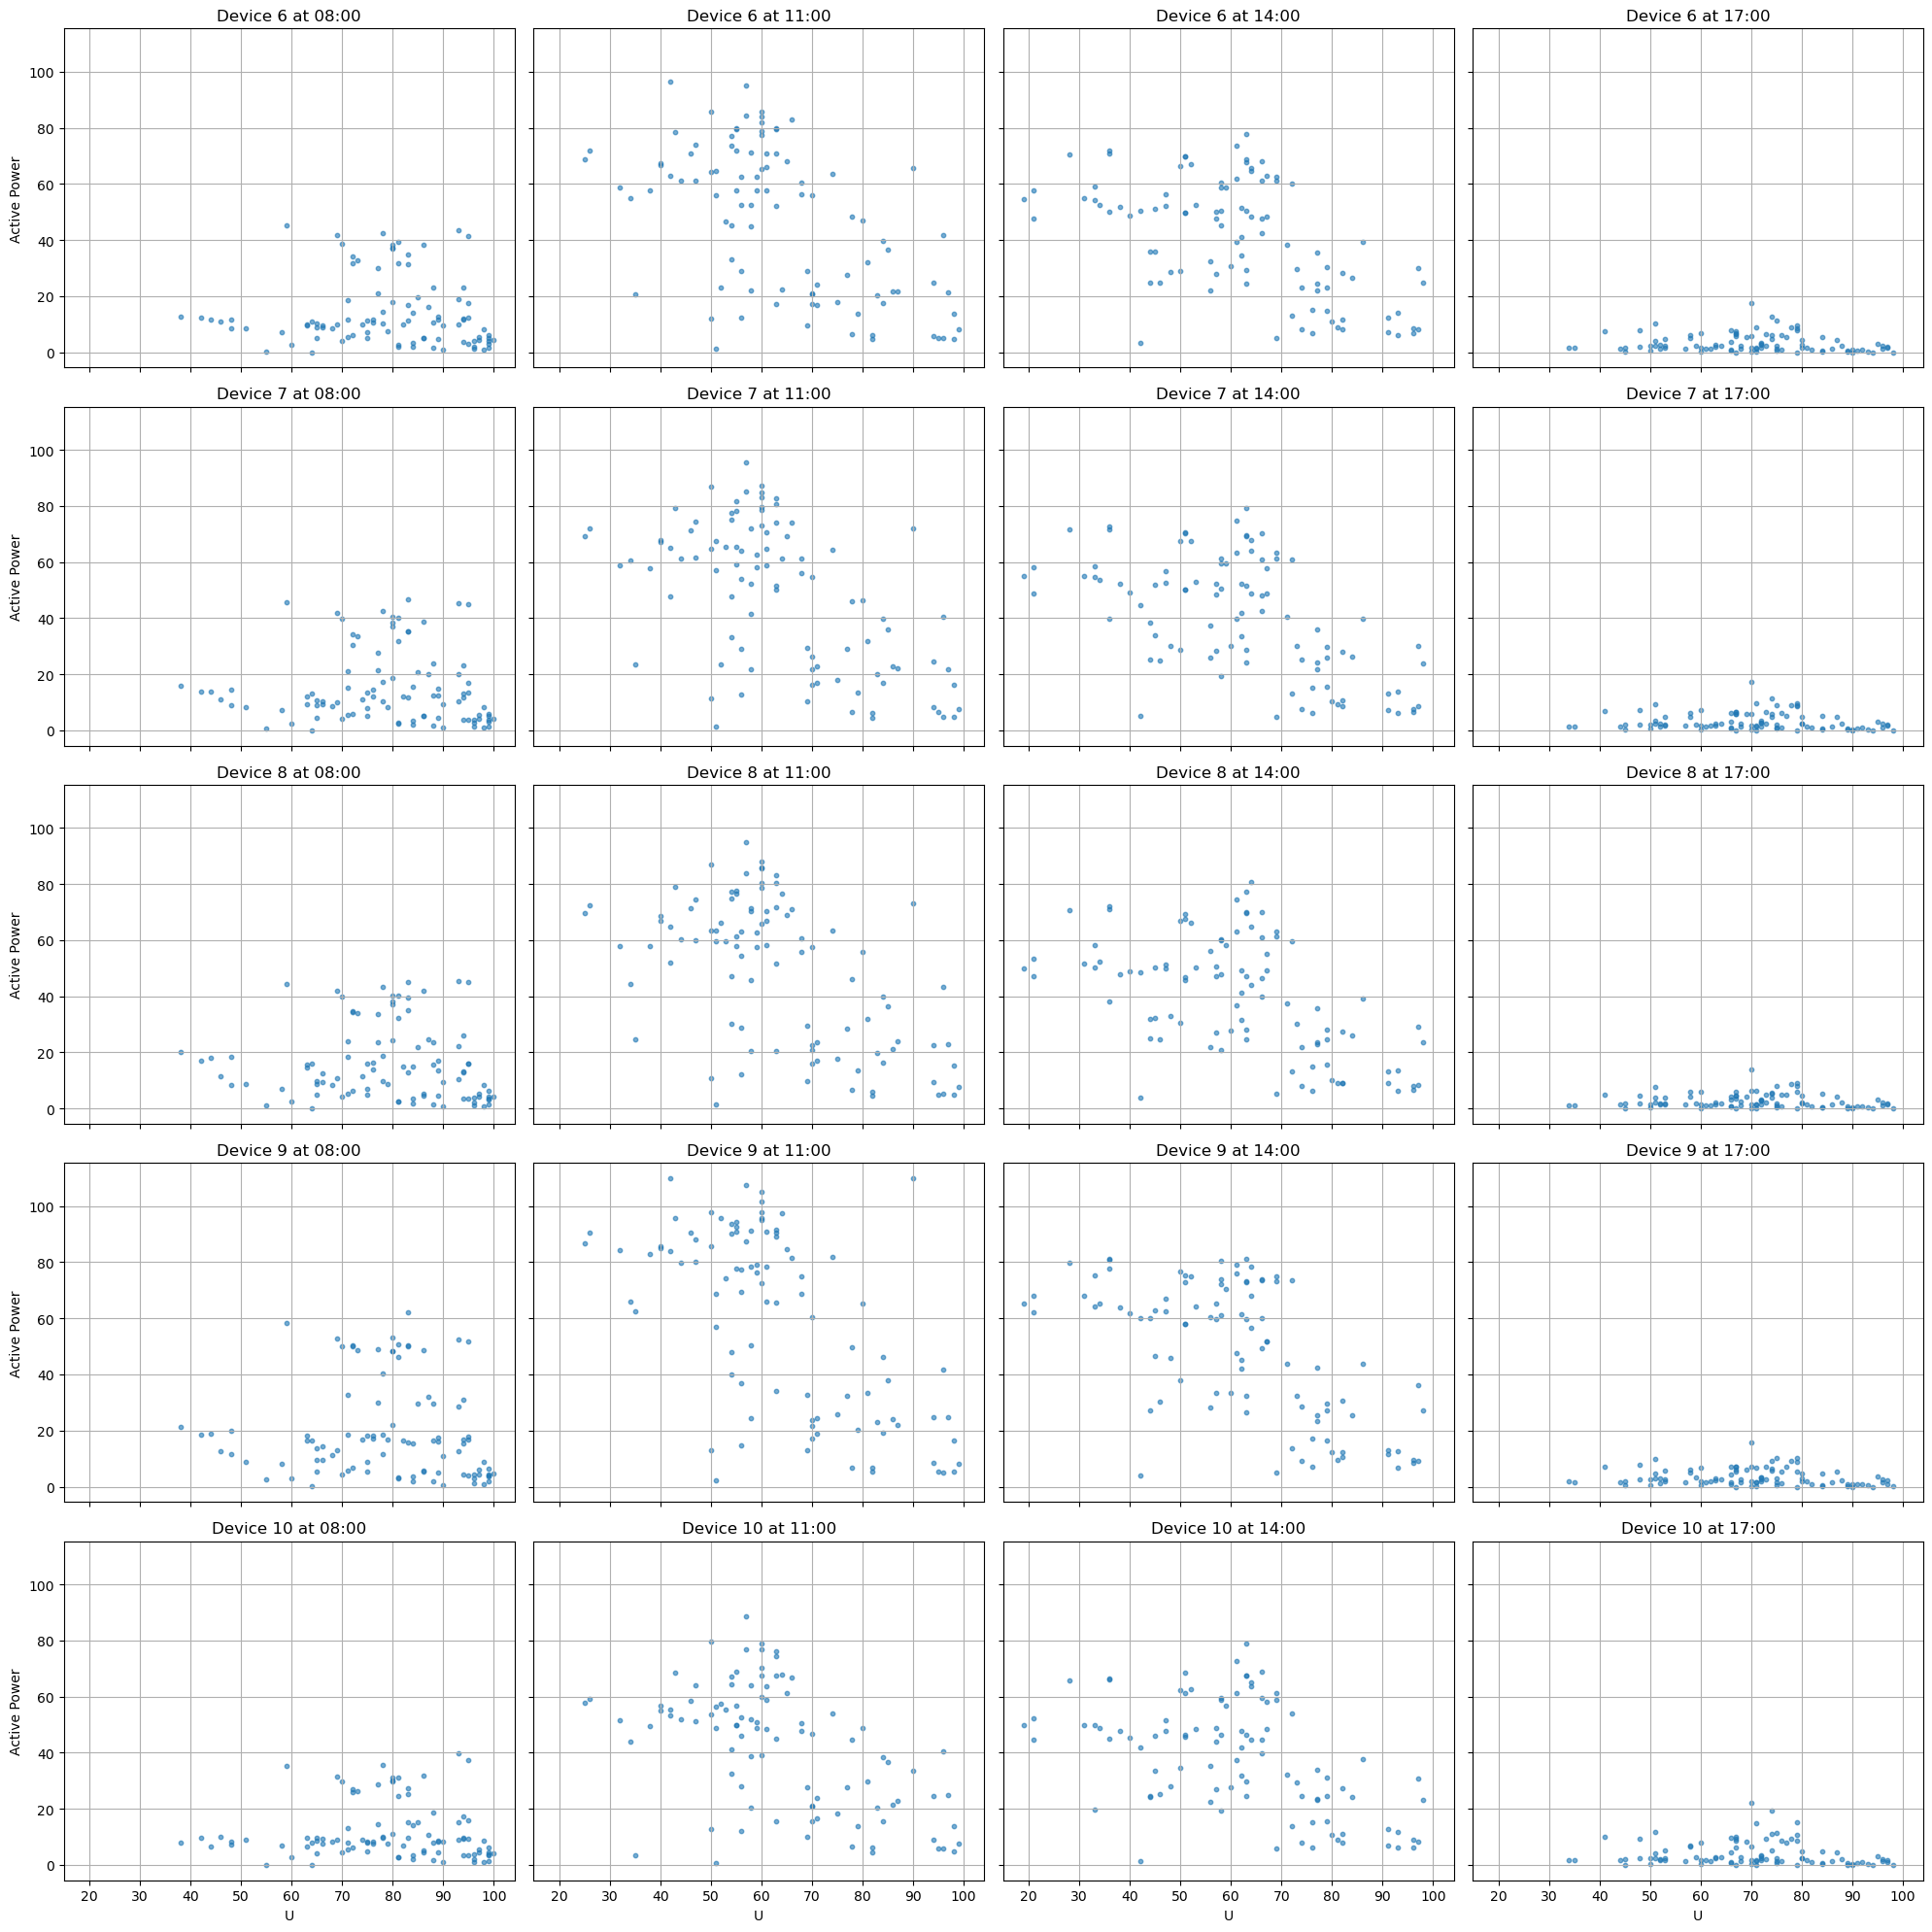

In [68]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20), sharex=True, sharey=True)

for i, device_id in enumerate(range(6, 11)):
    for j, specific_time in enumerate(times):
        time_filtered_df = df[(df['device_id'] == device_id) & (df['date_time'].dt.time == specific_time)]
        
        axs[i, j].scatter(time_filtered_df['U'], time_filtered_df['active_power'], alpha=0.6, s=10)
        axs[i, j].set_title(f'Device {device_id} at {specific_time.strftime("%H:%M")}')
        axs[i, j].grid(True)

for ax in axs.flat:
    ax.set(xlabel='U', ylabel='Active Power')
    ax.label_outer()

plt.tight_layout()
plt.show()

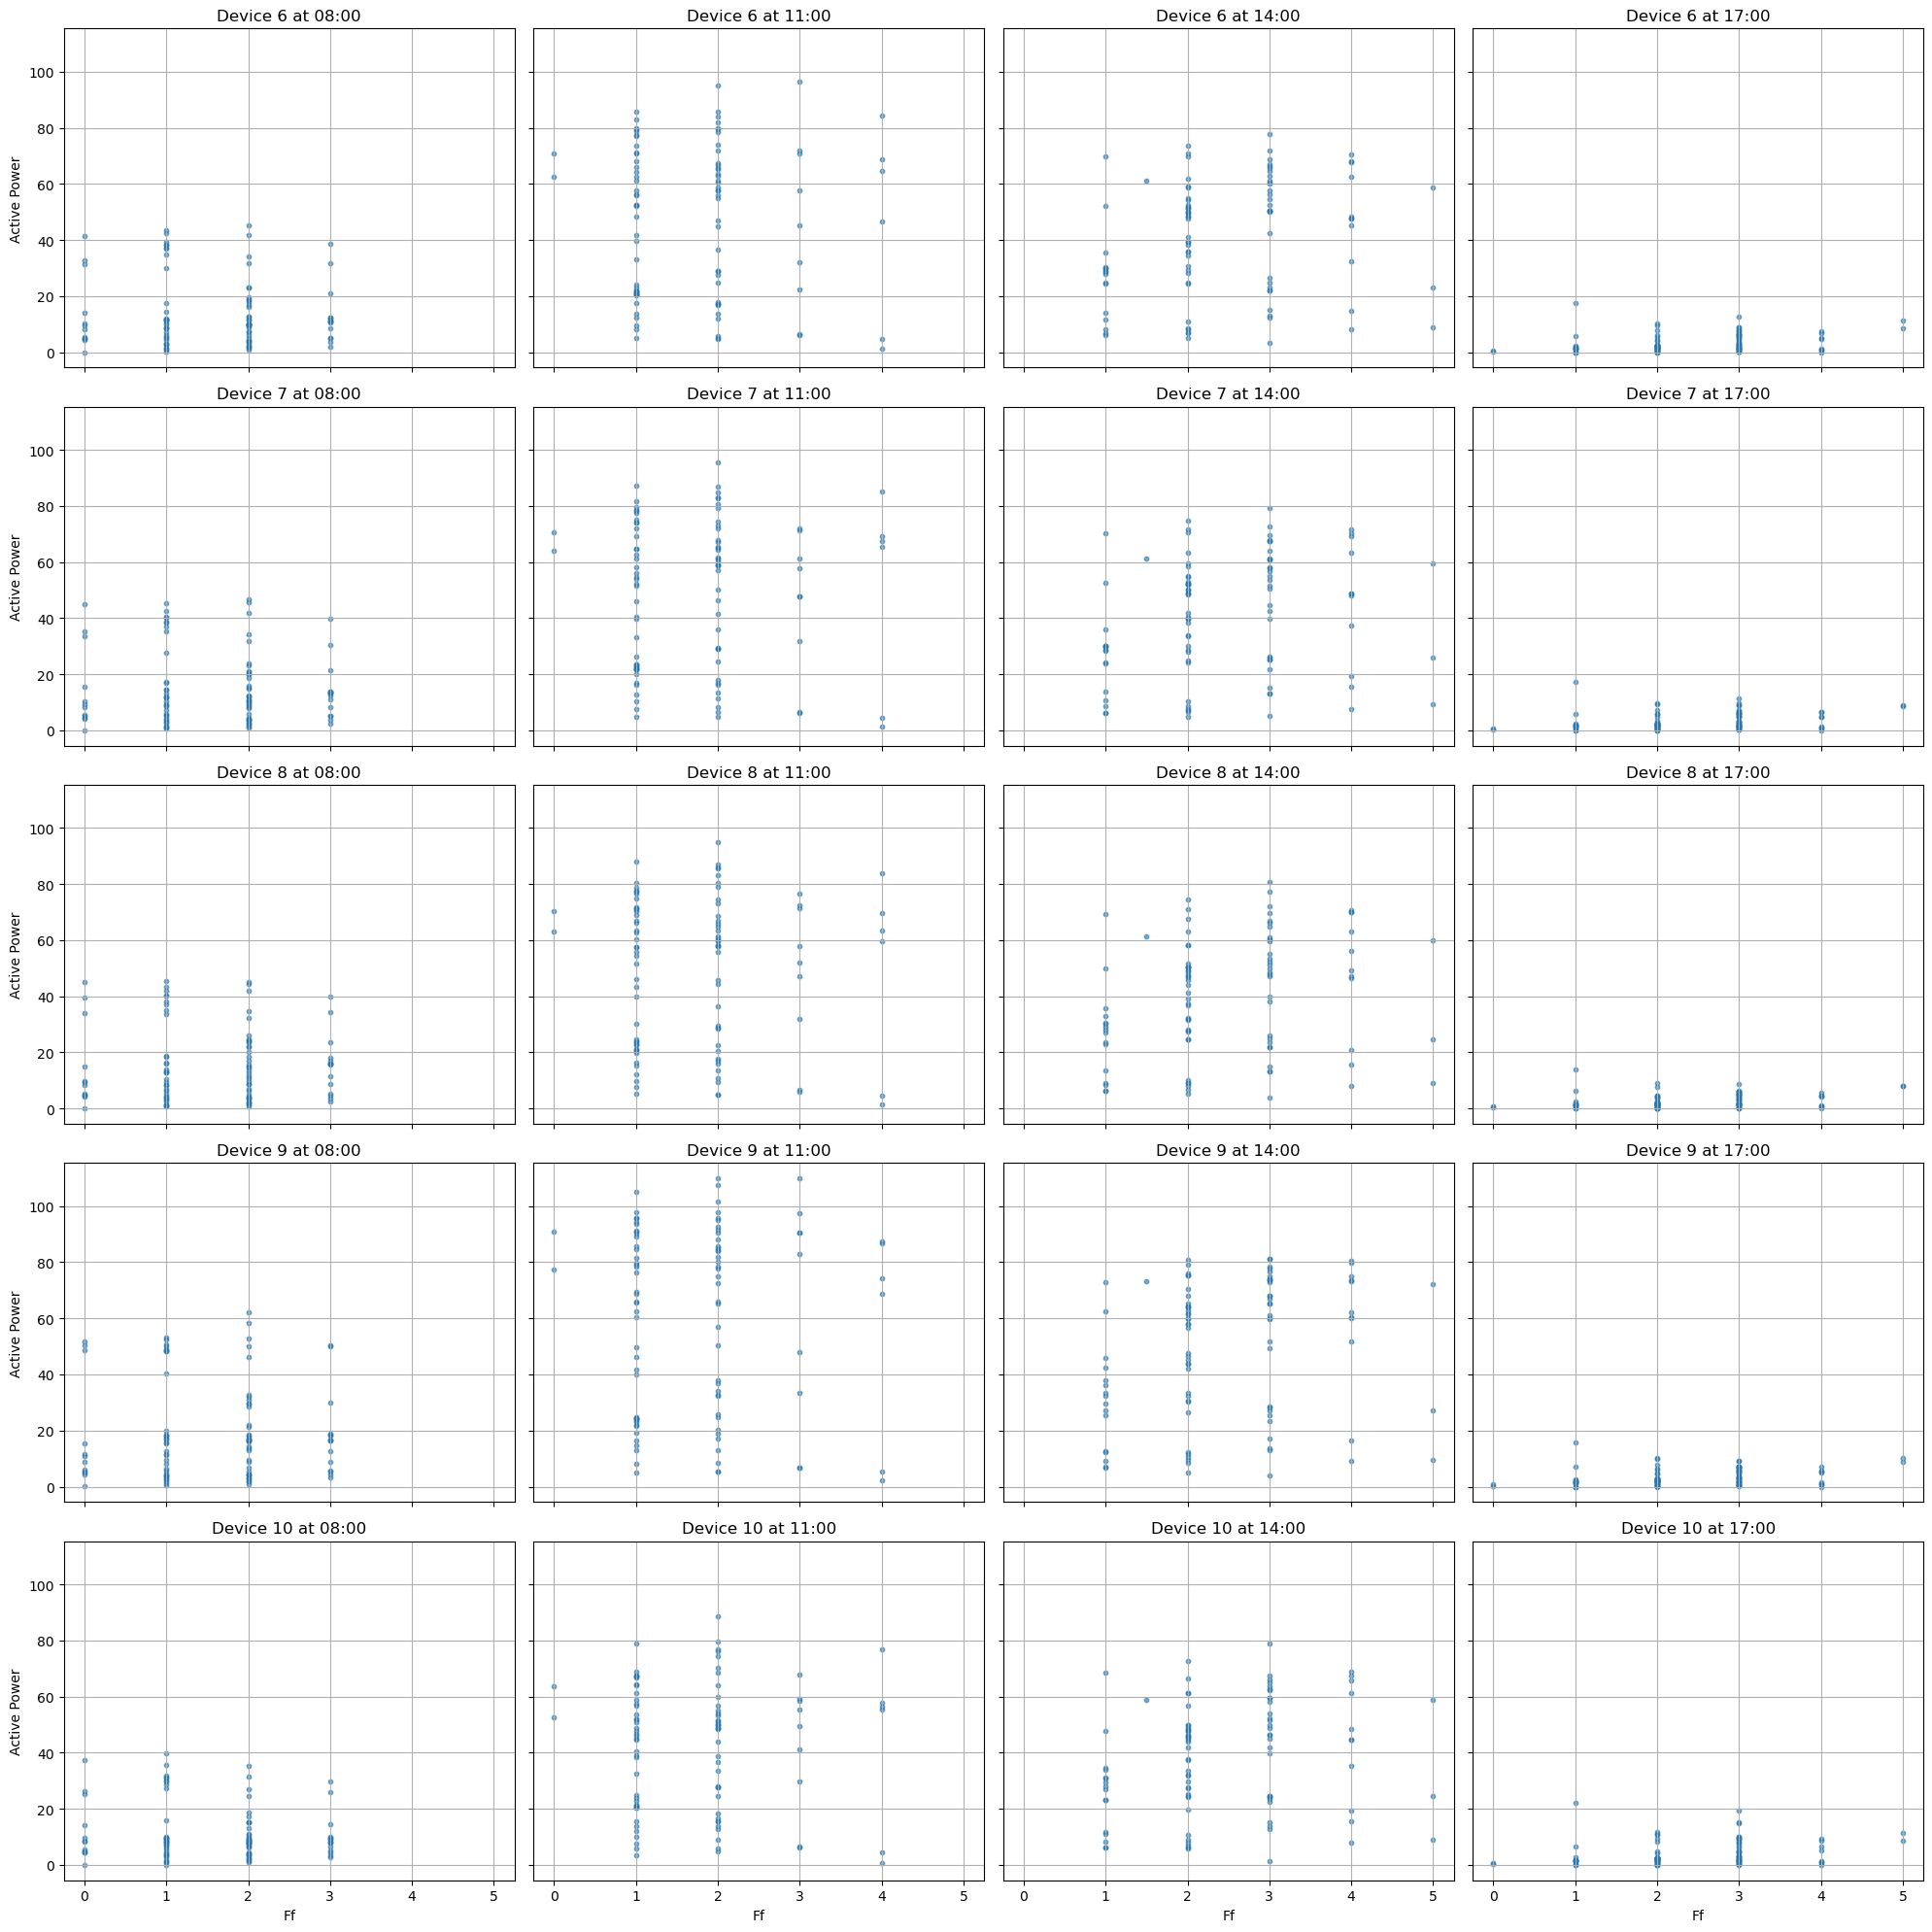

In [70]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20), sharex=True, sharey=True)

for i, device_id in enumerate(range(6, 11)):
    for j, specific_time in enumerate(times):
        time_filtered_df = df[(df['device_id'] == device_id) & (df['date_time'].dt.time == specific_time)]
        
        axs[i, j].scatter(time_filtered_df['Ff'], time_filtered_df['active_power'], alpha=0.6, s=10)
        axs[i, j].set_title(f'Device {device_id} at {specific_time.strftime("%H:%M")}')
        axs[i, j].grid(True)

for ax in axs.flat:
    ax.set(xlabel='Ff', ylabel='Active Power')
    ax.label_outer()

plt.tight_layout()
plt.show()

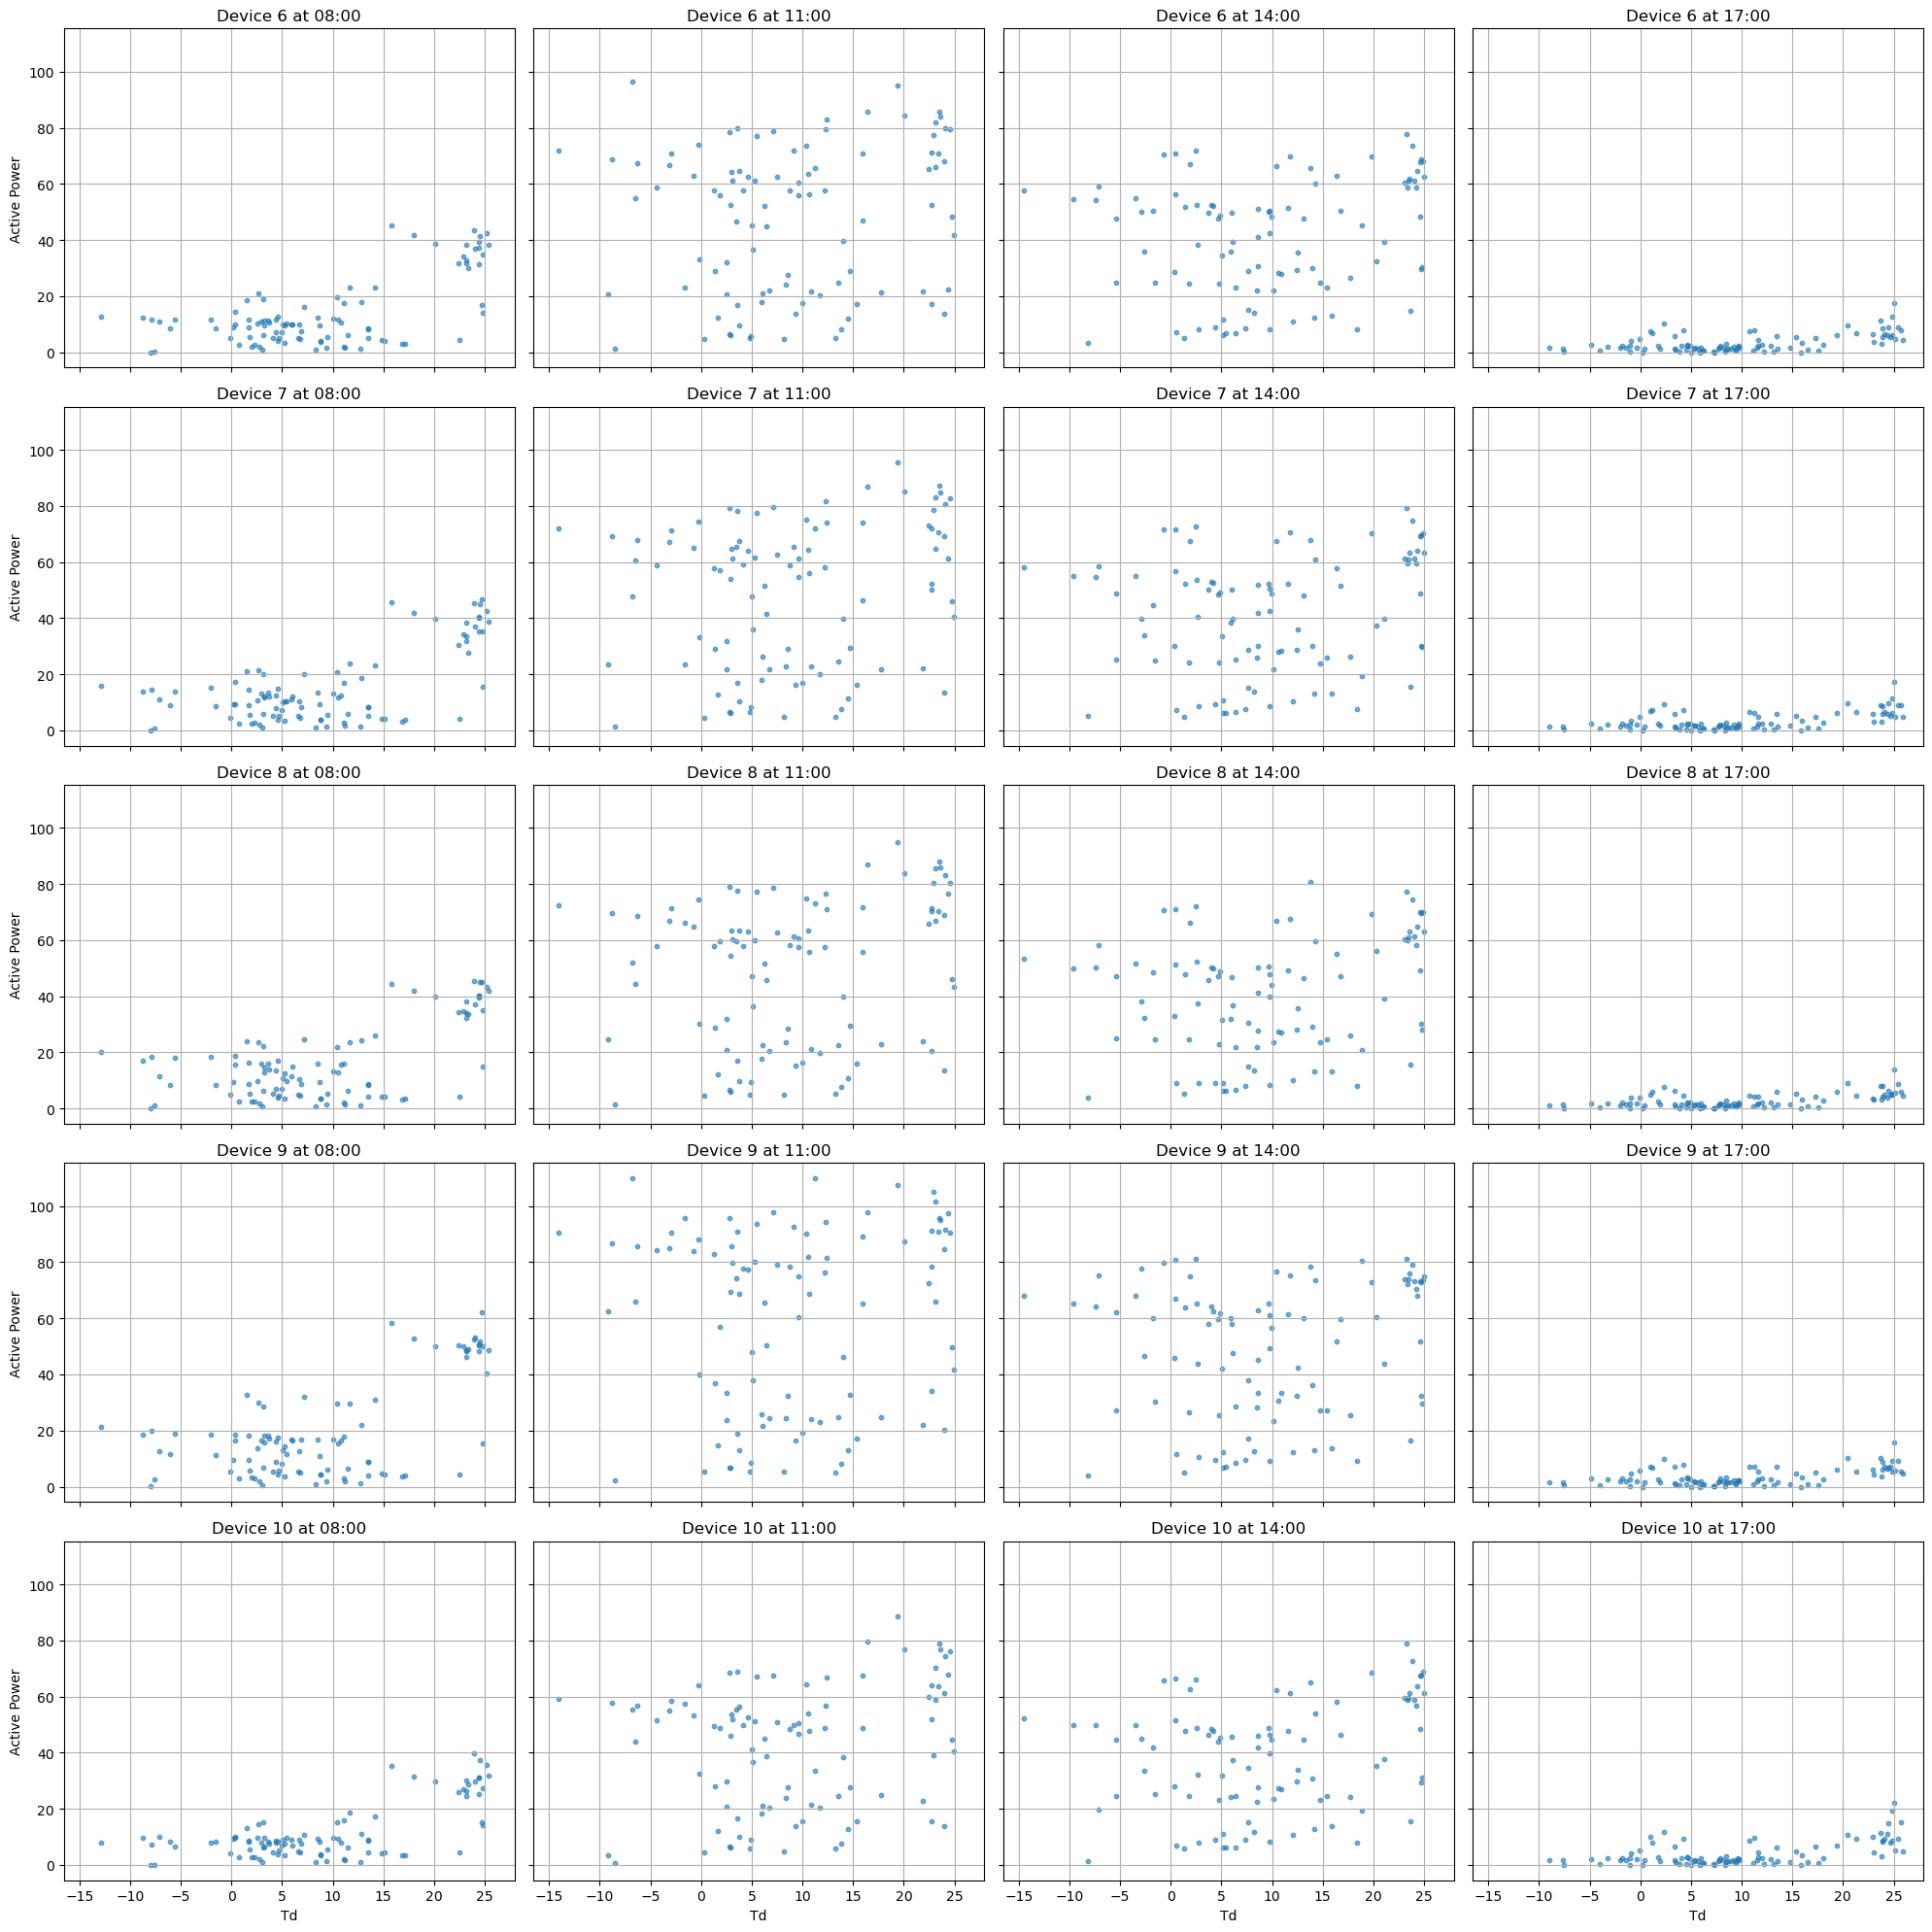

In [71]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20), sharex=True, sharey=True)

for i, device_id in enumerate(range(6, 11)):
    for j, specific_time in enumerate(times):
        time_filtered_df = df[(df['device_id'] == device_id) & (df['date_time'].dt.time == specific_time)]
        
        axs[i, j].scatter(time_filtered_df['Td'], time_filtered_df['active_power'], alpha=0.6, s=10)
        axs[i, j].set_title(f'Device {device_id} at {specific_time.strftime("%H:%M")}')
        axs[i, j].grid(True)

for ax in axs.flat:
    ax.set(xlabel='Td', ylabel='Active Power')
    ax.label_outer()

plt.tight_layout()
plt.show()

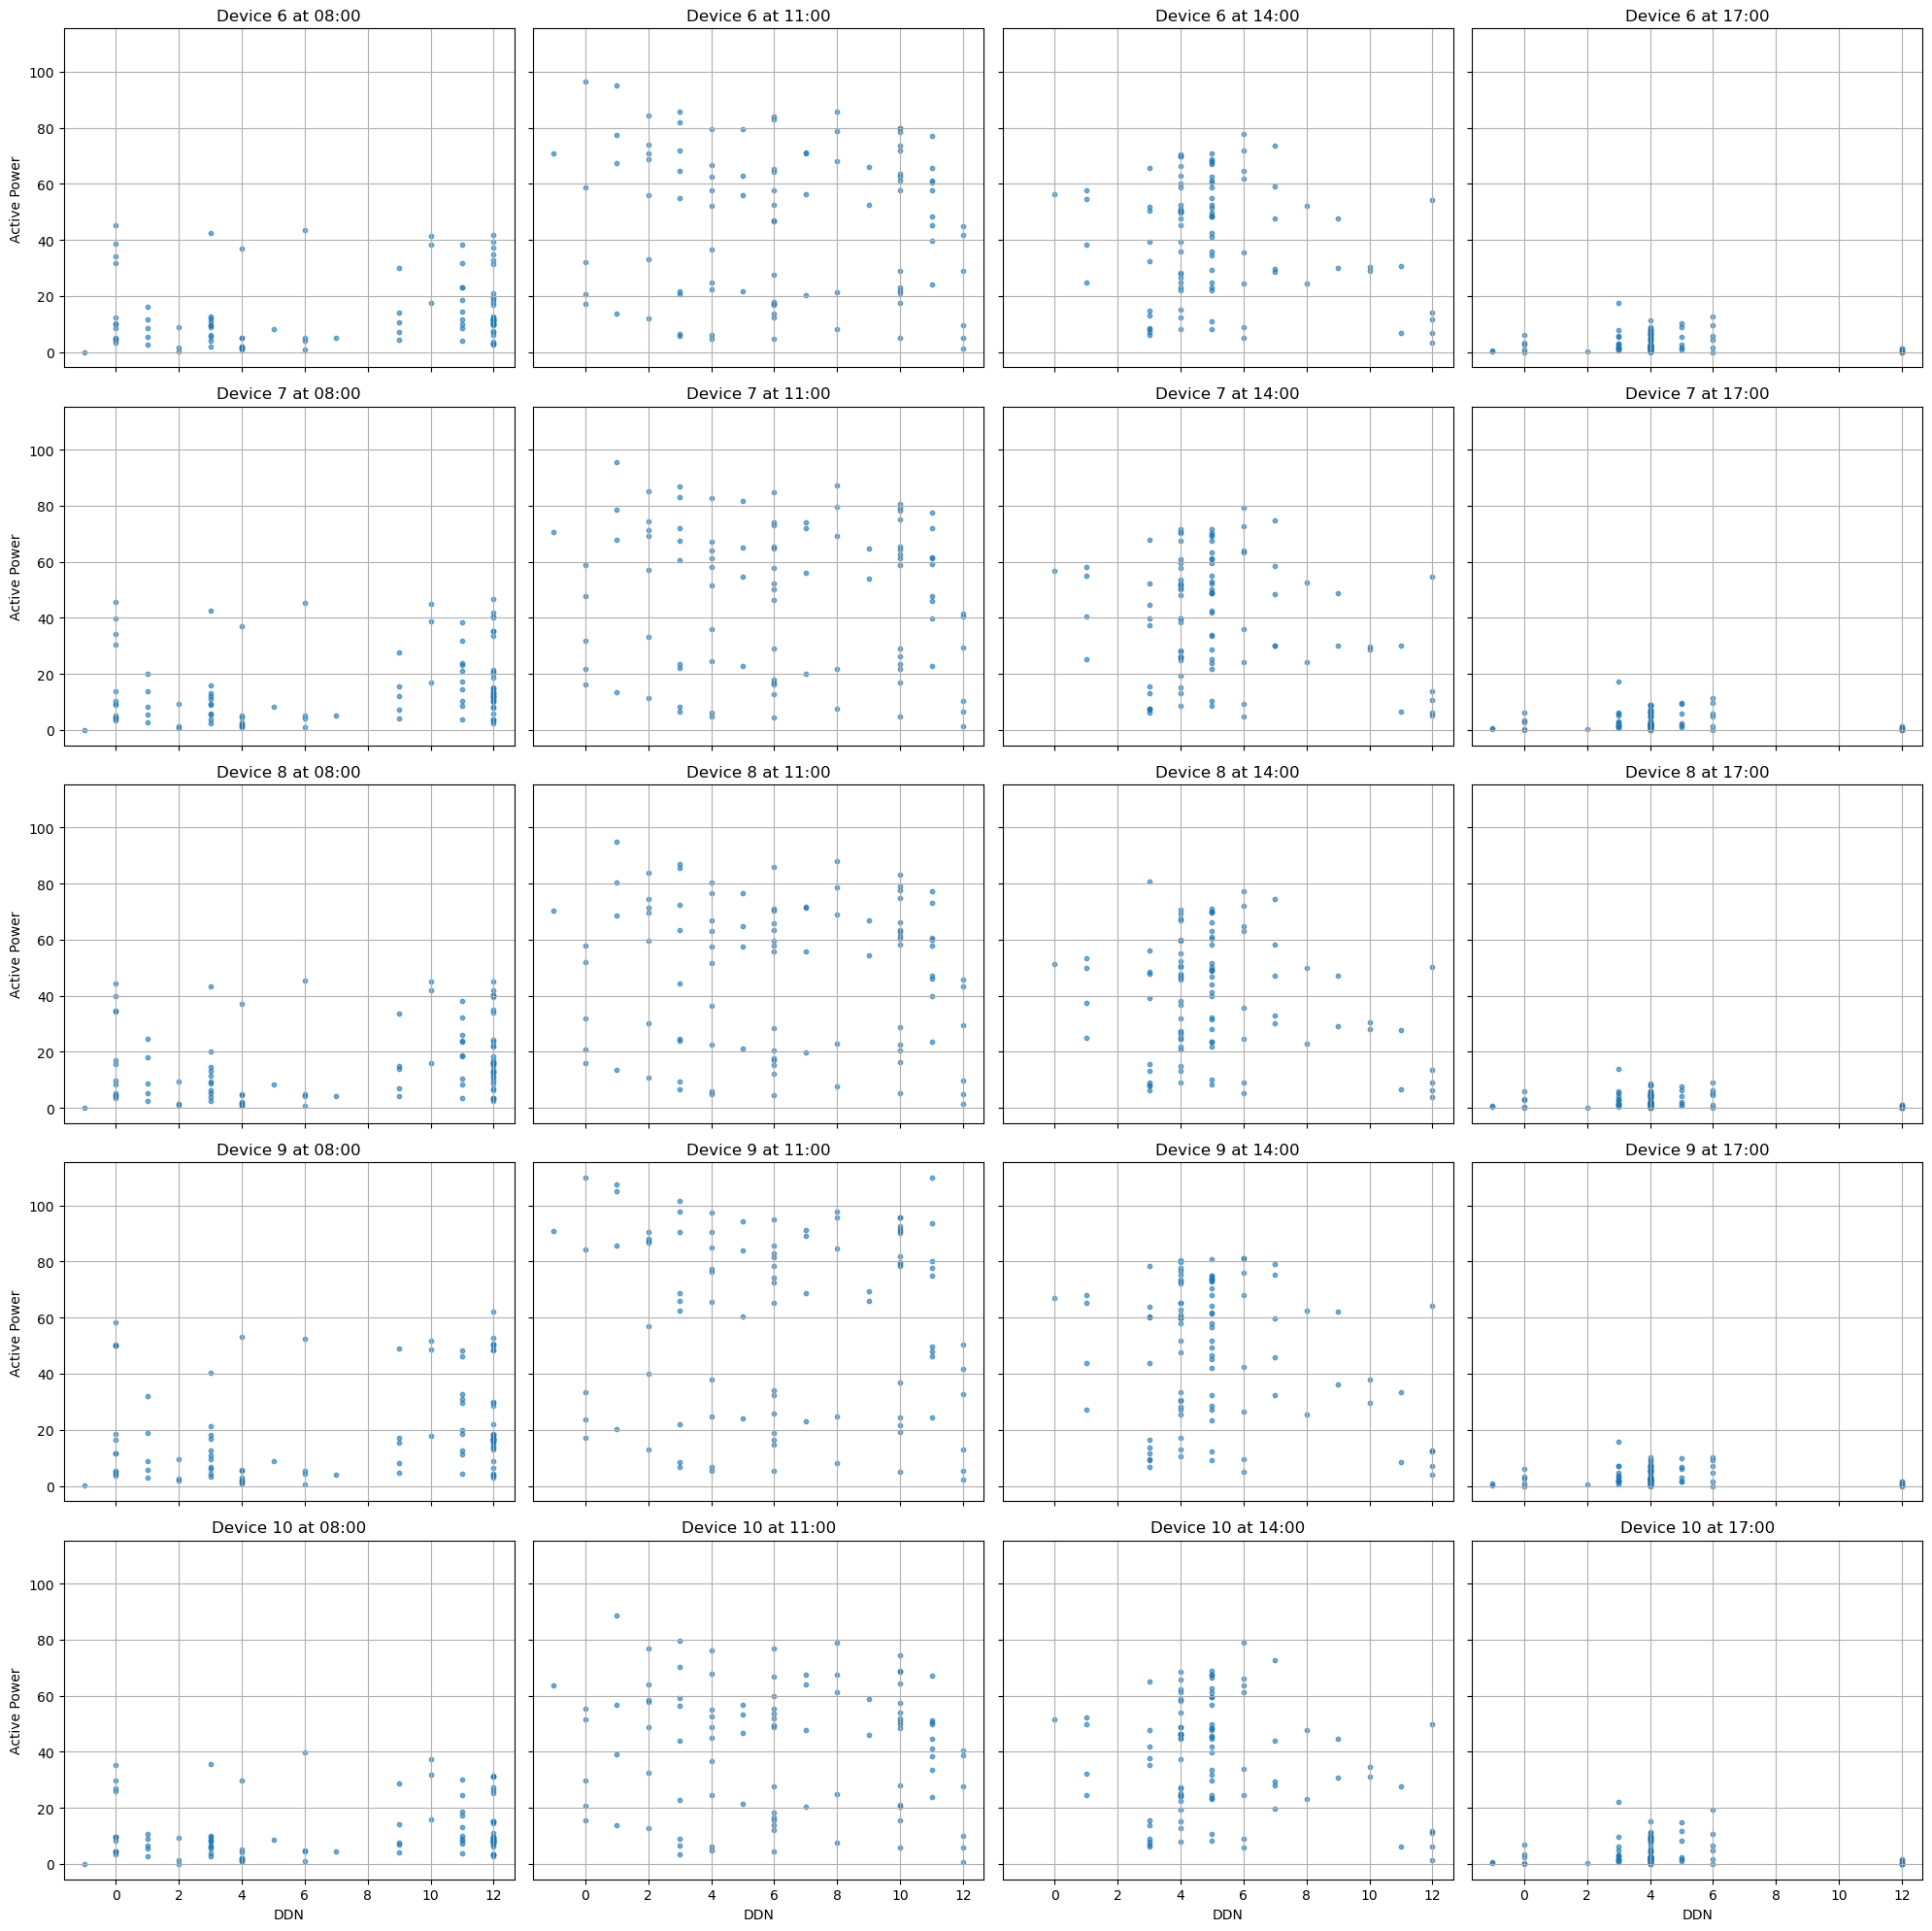

In [72]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20), sharex=True, sharey=True)

for i, device_id in enumerate(range(6, 11)):
    for j, specific_time in enumerate(times):
        time_filtered_df = df[(df['device_id'] == device_id) & (df['date_time'].dt.time == specific_time)]
        
        axs[i, j].scatter(time_filtered_df['DDN'], time_filtered_df['active_power'], alpha=0.6, s=10)
        axs[i, j].set_title(f'Device {device_id} at {specific_time.strftime("%H:%M")}')
        axs[i, j].grid(True)

for ax in axs.flat:
    ax.set(xlabel='DDN', ylabel='Active Power')
    ax.label_outer()

plt.tight_layout()
plt.show()